# 4. GAUSSIAN ELIMINATION METHOD

## PART A: IMPLEMENTING GAUSSIAN ELIMINATION

In [84]:
#needed packages
import random
import numpy as np
import matplotlib.pyplot as plt
import random

### A.1 GENERATE MATRIX X

In [85]:
#mean=2 and sigma=0.01
x = np.random.normal(2, 0.01, 1000).reshape(100,10)
#checking the created matrix's dimension
print('Dimension of x :\n',x.shape)

Dimension of x :
 (100, 10)


### A.2. GENERATE MATRIX Y

In [86]:
#creating a random matrix with uniform distribution
y =np.random.uniform( 0,10,100).reshape(100,1)

#checking the dimension of created matrrix
print('Dimension of y:\n',y.shape)

Dimension of y:
 (100, 1)


### A.3 LINEAR REGRESSION ALGORITHM

Now we will use $\beta= (X^TX)^{-1}X^TY$ formula. First we will calculate $A^{-1}=(X^TX)^{-1}$. first we have to add a 1 vector column to x matris for bias.

#### A.3.1 Adding to 1 column vector to X

In [87]:
#creating a 1 column vector
one_vector =np.ones((100,1))

X =np.hstack((x,one_vector))
print(X)

[[1.98203965 1.98717043 1.99432386 ... 2.00119053 2.00291333 1.        ]
 [2.004663   1.98854442 1.98483281 ... 1.98649845 2.00427849 1.        ]
 [2.01380524 2.00335039 2.0056528  ... 1.98139026 1.99725432 1.        ]
 ...
 [2.00055829 2.00586069 1.97439578 ... 2.00473462 1.99446942 1.        ]
 [1.99738547 1.99839435 2.01878457 ... 2.0001222  1.99769389 1.        ]
 [1.99414618 2.00193691 1.99495983 ... 2.00582859 2.02190532 1.        ]]


#### A.3.2 Calculating $(X^TX)^{-1}$

In [88]:
#transpose of x
X_transpose = np.transpose(X)

#matrix multiplication of x and its transpose
H = np.matmul(X_transpose,X)

#inverse of matrix multiplication of x and its transpose
H_inverse = np.linalg.inv(H)

In [89]:
H_inverse.shape

(11, 11)

#### A.3.3 Calculating  $ \beta=(X^TX)^{-1}X^TY$

In [90]:
#betas
beta_by_lineerreg = np.matmul(np.matmul(H_inverse,X_transpose),y)

In [91]:
#betas shape
beta_by_lineerreg.shape

(11, 1)

In [92]:
beta_by_lineerreg

array([[ 44.8044448 ],
       [  1.57690102],
       [ 39.38291343],
       [ -6.19187603],
       [ -1.84298809],
       [-40.93187542],
       [  0.71845975],
       [-17.75139838],
       [-21.47344935],
       [  3.45756743],
       [  1.15010312]])

#### A.3.4 Predictions By Lineer Regression Algorithm

In [93]:
predictions_bylineerreg =np.matmul(X,beta_by_lineerreg)

#### A:3.4 Plotting By Lineer Regression Algortihm

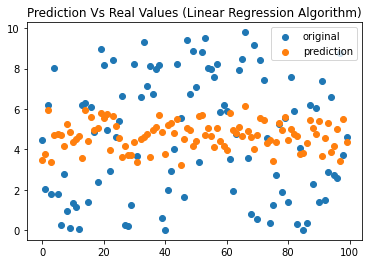

In [94]:
plt.title('Prediction Vs Real Values (Linear Regression Algorithm)')
plt.scatter(list(range(100)),y , label="original")
plt.scatter(list(range(100)), predictions_bylineerreg, label="prediction")
plt.legend()
plt.show()

### A.4 GAUSSION ELIMINATION

$AX=b$ and $A$ is an $nxn$ matrix. Then I simply used the algortima which is written on homework:

In [95]:
def gaussian_elimination(A,b):
    n=A.shape[0]
    z=np.zeros((n,1))
    for k in range(0,n-1):
        for i in range(k+1,n):
            A[i][k]=A[i][k]/A[k][k]
            for j in range(k+1,n):
                A[i][j]=A[i][j]-A[i][k]*A[k][j]
                
    #forword elimination
    for k in range(0,n-1):
        for i in range(k+1,n):
            b[i]=b[i]-A[i][k]*b[k]
        
    #backward solve
    for h in range(0,n):
        i=n-1-h
        s=b[i]
        for j in range(i+1,n):
            s=s-A[i][j]*z[j]
        z[i]=s/A[i][i]
    return z
        

### A.5 IMPLEMENTATION OF GAUSSIAN ELIMINATION

#### A.5.1 Finding Beta by Using Gaussian Elimination Method

In [96]:
b_matrix = np.matmul(np.transpose(X),y)

In [97]:
beta_by_gaussian = gaussian_elimination(H,b_matrix)

In [98]:
print(beta_by_gaussian)

[[ 44.8044448 ]
 [  1.57690102]
 [ 39.38291343]
 [ -6.19187603]
 [ -1.84298809]
 [-40.93187542]
 [  0.71845975]
 [-17.75139838]
 [-21.47344935]
 [  3.45756743]
 [  1.15010312]]


#### A.5.2 Predictions By Gaussian Elimination Function

In [99]:
predictions_by_gaussian = np.matmul(X,beta_by_gaussian)

### A.6 PLOTTING BY GAUSSION ELIMINATION

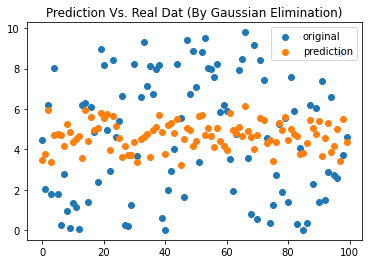

In [100]:
plt.title('Prediction Vs. Real Dat (By Gaussian Elimination)')
plt.scatter(list(range(100)),y , label="original")
plt.scatter(list(range(100)), predictions_by_gaussian, label="prediction")
plt.legend()
plt.show()

### A.7 PREDICTION BY np.linalg.lstsp

In [101]:
beta_by_nplinalg=np.linalg.lstsq(X,y,rcond=None)
beta_by_nplinalg[0]

array([[ 44.8044448 ],
       [  1.57690102],
       [ 39.38291343],
       [ -6.19187603],
       [ -1.84298809],
       [-40.93187542],
       [  0.71845975],
       [-17.75139838],
       [-21.47344935],
       [  3.45756743],
       [  1.15010312]])

In [102]:
prediction_by_nplinalg =np.matmul(X,beta_by_nplinalg[0])

#### A.7. Plotting By np.linalg.lstsp

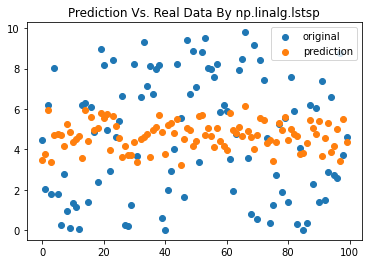

In [103]:
plt.title('Prediction Vs. Real Data By np.linalg.lstsp')
plt.scatter(list(range(100)),y , label="original")
plt.scatter(list(range(100)), prediction_by_nplinalg, label="prediction")
plt.legend()
plt.show()

## PART B: MULTIPLE LINEAR (AUTO) REGRESSION

### a. The Stores That Have 942 Days Record


In [104]:
#REMOVING THE STORES THT DONT HAVE 942 DAYS SALES RECORD
stores_942 =[]

#we are looking for in the 1000 stores that do not have 942 days sale record.
for i in range(0,1115):
    a =train.loc[train['Store']==i,'Sales']
    if len(a)==942:
        stores_942.append(train[train['Store']==i][['Store','Sales']])
  
        

In [105]:
len(stores_942)

933

There 933 store that have 942 days record.

In [106]:
stores_942[1]

,Store,Sales
1,2,6064
1116,2,5567
2231,2,6402
3346,2,5671
4461,2,6627
...,...,...
1011636,2,2342
1012751,2,4484
1013866,2,4159
1014981,2,4422


### b. Create A Data Matrix

In [107]:
sales_of_942=[]
for i in range(0,933):
    sales_of_942.append(stores_942[i]['Sales'])
    

In [108]:
#row store, column day
data_matrix=np.array(sales_of_942)
print(data_matrix)

[[ 5263  5020  4782 ...  4327  5530     0]
 [ 6064  5567  6402 ...  4159  4422     0]
 [ 8314  8977  7610 ...  5902  6823     0]
 ...
 [ 9626  9652  9179 ...  8716 10797     0]
 [ 7289  7491  6640 ...  5563  6218     0]
 [27508 24395 25840 ... 18463 20642     0]]


### c.1.Training  

In [109]:
#first 800 store and first 900 days
X_train = data_matrix[:800,42:]

#first 800 store and last 42 days
Y_train=data_matrix[:800,:42]

In [110]:
print(X_train.shape)
print(Y_train.shape)

(800, 900)
(800, 42)


### c.2 Test

In [111]:
#rest of stores and first 900 days
X_test=data_matrix[800:,42:]

#rest of stores and öast42 days
Y_test=data_matrix[800: , :42]

In [112]:
print(X_test.shape)
print(Y_test.shape)

(133, 900)
(133, 42)


### d. Model

In [113]:
X_train 

array([[4202, 4645, 4000, ..., 4327, 5530,    0],
       [4926, 5154, 6924, ..., 4159, 4422,    0],
       [8074, 7537, 8524, ..., 5902, 6823,    0],
       ...,
       [3357, 3478, 3618, ..., 4059, 4072,    0],
       [8073, 8042, 9478, ..., 5977, 6854,    0],
       [4142, 4234, 3999, ..., 5320, 5826,    0]], dtype=int64)

In [114]:
Y_train

array([[ 5263,  5020,  4782, ...,  3846,     0,  4097],
       [ 6064,  5567,  6402, ...,  4123,     0,  3020],
       [ 8314,  8977,  7610, ...,  5840,     0,  3891],
       ...,
       [ 4833,  3894,  3172, ...,  2822,     0,  1646],
       [11276,  8711,  8689, ...,  6843,     0,  5085],
       [ 4357,  3789,  3755, ...,  4087,     0,  2838]], dtype=int64)

### d.1 Linear Regression Functin

Now we will use $\beta= (X^TX)^{-1}X^TY$ formula to find betas. 

In [115]:
#creating a function that calculates linear regression
def lin_reg(X,Y):
    A_inverse = np.linalg.inv(np.matmul(np.transpose(X),X))
    beta= np.matmul(np.matmul(A_inverse,np.transpose(X)),Y)
    return beta
    

My computer could not run this function, for this reason i uses linalg.lstsq

In [117]:
#creating a list of full of betas(consists of 900 parameter)
beta_42=[]
for i in range(0,42):
    beta_42.append(np.linalg.lstsq(X_train,Y_train[:,i],rcond=None)[0])

In [120]:
len(beta_42)

42

beta_42 list of all parameters for each days prediction. So we have 42 different model for each days prediciton.

### e. Verifying  Betas dimensions 

In [121]:
len(beta_42[1])

900

Now we can make predictions,

In [125]:
#predictions for each day
predictions_each_day =[]
for i in range(0,42):
    predictions_each_day.append(np.matmul(X_test,beta_42[i]))

In [127]:
#example first day prediction is:
predictions_each_day[0]

array([  7100.33939591,   6456.69354737,   4861.12731812,  11600.31523338,
        16443.17105837,  10317.01959573,  14325.03573081,   4097.90399421,
         3039.54880154,   4442.89915368,   -665.44823257,    904.39380609,
        -4827.04947994,  21058.27609019,   9363.65258576,  11506.18193902,
         8006.25001299,  10704.61552533,  17836.8112336 ,  -5512.56684024,
          893.04829268,   9863.64720386,  33242.32932835,  -2481.29844439,
         9084.85846971,  -2607.59592843,  17027.61612351,  10086.38128349,
        16332.6395216 ,   6192.10224209,  18566.45218127,   8154.97482292,
         8575.05295448,  22076.21375976,   4665.89310233,   5190.29630423,
        17772.67787999,   3800.08407616,   6476.9315138 ,  -2156.58423309,
         1559.78092215,  10280.6961318 ,  19892.63727221,   8302.58729173,
         2416.83661223,   5928.52356502,   4276.63726897,  17854.99904341,
         8436.30539152,   5716.45360886,  19443.26454606,  21748.14607433,
        13340.18736623,  

### f. RMSE and MAE 

In [131]:
#example
first_day_predicition=np.matmul(X_test,beta_42[0])
second_day_prediction=np.matmul(X_test,beta_42[1])

#### f.1. 42 days prediction by using d 42 different betas

In [133]:
daily_prediction_42=[]
for i in range(0,42):
    daily_prediction_42.append(np.matmul(X_test,beta_42[i]))
    

In [140]:
#example: first day prediction of each store (133 store)
daily_prediction_42[0]

array([  7100.33939591,   6456.69354737,   4861.12731812,  11600.31523338,
        16443.17105837,  10317.01959573,  14325.03573081,   4097.90399421,
         3039.54880154,   4442.89915368,   -665.44823257,    904.39380609,
        -4827.04947994,  21058.27609019,   9363.65258576,  11506.18193902,
         8006.25001299,  10704.61552533,  17836.8112336 ,  -5512.56684024,
          893.04829268,   9863.64720386,  33242.32932835,  -2481.29844439,
         9084.85846971,  -2607.59592843,  17027.61612351,  10086.38128349,
        16332.6395216 ,   6192.10224209,  18566.45218127,   8154.97482292,
         8575.05295448,  22076.21375976,   4665.89310233,   5190.29630423,
        17772.67787999,   3800.08407616,   6476.9315138 ,  -2156.58423309,
         1559.78092215,  10280.6961318 ,  19892.63727221,   8302.58729173,
         2416.83661223,   5928.52356502,   4276.63726897,  17854.99904341,
         8436.30539152,   5716.45360886,  19443.26454606,  21748.14607433,
        13340.18736623,  

#### f.2 Error between prediction and Real Values

In [149]:
error_42 =np.ones((133,42))
for i in range(0,42):
    for j in range(0,133):
        error_42[j][i]=Y_test[j][i]-daily_prediction_42[i][j]
        

In [152]:
#error matris
error_42

array([[ 3.60766060e+03,  1.94886477e+03,  2.31983484e+03, ...,
        -1.76913782e+03,  2.97397604e-11, -2.22182197e+03],
       [ 2.62430645e+03,  5.37283507e+03,  5.55708569e+03, ...,
        -1.06936335e+03, -4.12328056e-12, -3.14523024e+03],
       [ 4.06487268e+03,  4.86518246e+03,  2.31951168e+02, ...,
        -2.15114582e+03,  5.46860470e-11,  7.49220945e+03],
       ...,
       [-6.31457427e+03, -8.50773695e+03, -2.58961982e+03, ...,
        -4.04028578e+03, -1.28666408e-10,  3.07822488e+03],
       [ 6.64747015e+02, -1.13264001e+02, -4.40727319e+03, ...,
        -1.81299895e+03, -5.60521660e-12, -1.57058824e+03],
       [-4.04100872e+03, -5.15219754e+03,  1.50195555e+04, ...,
         1.11501636e+02, -1.96497430e-10, -2.48177206e+03]])

In [153]:
error_42.shape

(133, 42)

#### f.3 RMSE

In [156]:
#rmse of a matric
def rmse(X):
    error=0
    for i in range(0,X.shape[0]):
        for j in range(0,X.shape[1]):
            error=X[i][j]**2+error
    return np.sqrt(error/X.shape[0]*X.shape[1])

In [166]:
print('RMSE=',rmse(error_42))

RMSE= 205077.16366757796


#### f.4 MAE

In [167]:
#mae of a matric
def mae(M):
    error_mae=0
    for i in range(0,M.shape[0]):
        for j in range(0,M.shape[1]):
            error_mae=error_mae+M[i][j]
    return error_mae/M.shape[0]*M.shape[1]
            

In [168]:
print('MAE=',mae(error_42))

MAE= 13093.599468557557
